# Q-10

### Business Understanding:

We have to build a model which will be able to predict whether a user would click on an ad or not.

In [34]:
import os
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sk-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [35]:
#  Load the train data using
df = pd.read_csv('D:\\FSDS-iNeuron\\3.Resource\\Dataset\\Placement_Task\\Click_ThroughRatePrediction\\train.csv', nrows=1000)
df

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10143043261436144411,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,100084,79
996,1014322937494547310,0,14102100,1005,0,f282ab5a,61eb5bc4,f028772b,ecad2386,7801e8d9,...,1,0,20596,320,50,2161,0,35,-1,157
997,10143295888139735045,0,14102100,1005,0,030440fe,08ba7db9,76b2941d,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
998,10143417277678185860,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15703,320,50,1722,0,35,-1,79


In [36]:
# Loading test data

df_test = pd.read_csv('D:\\FSDS-iNeuron\\3.Resource\\Dataset\\Placement_Task\\Click_ThroughRatePrediction\\test.csv', nrows=1000)

### Let's Understand the data

**Data Set Information:**

This is a 10 days of click-through data, ordered chronologically. Non-clicks and clicks are subsampled according to different strategies.

**Attribute Information:**

- id: ad identifier
- click: 0/1 for non-click/click
- hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.
- C1 -- anonymized categorical variable
- banner_pos
- site_id
- site_domain
- site_category
- app_id
- app_domain
- app_category
- device_id
- device_ip
- device_model
- device_type
- device_conn_type
- C14-C21 -- anonymized categorical variables

## Basic analysis and data preprocessing

In [37]:
# Top 5 records

df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [38]:
# Shape of the data

df.shape

(1000, 24)

In [39]:
# Column names

df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [40]:
# Data types of the dataset

df.dtypes

id                  uint64
click                int64
hour                 int64
C1                   int64
banner_pos           int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
dtype: object

In [41]:
# Basic information on dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1000 non-null   uint64
 1   click             1000 non-null   int64 
 2   hour              1000 non-null   int64 
 3   C1                1000 non-null   int64 
 4   banner_pos        1000 non-null   int64 
 5   site_id           1000 non-null   object
 6   site_domain       1000 non-null   object
 7   site_category     1000 non-null   object
 8   app_id            1000 non-null   object
 9   app_domain        1000 non-null   object
 10  app_category      1000 non-null   object
 11  device_id         1000 non-null   object
 12  device_ip         1000 non-null   object
 13  device_model      1000 non-null   object
 14  device_type       1000 non-null   int64 
 15  device_conn_type  1000 non-null   int64 
 16  C14               1000 non-null   int64 
 17  C15            

In [42]:
# Object type columns

object_cols = [col for col in df.columns if df[col].dtype == "object"]

print('Categorical columns that will be ordinal encoded:', object_cols)

Categorical columns that will be ordinal encoded: ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']


In [43]:
# For numerical features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
print(numerical_features)

['id', 'click', 'hour', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']


In [44]:
# Checking nul values

df.isna().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

#### Observation:
- There are 0 missing data

In [45]:
# Checking duplicate records

df.duplicated().sum()

0

#### Observation:
- There are 0 duplicate records

In [46]:
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

### EDA

### Univariate Analysis

**"click"**

In [47]:
df['click'].value_counts()

0    840
1    160
Name: click, dtype: int64

Text(0.5, 1.0, 'Feature name : click')

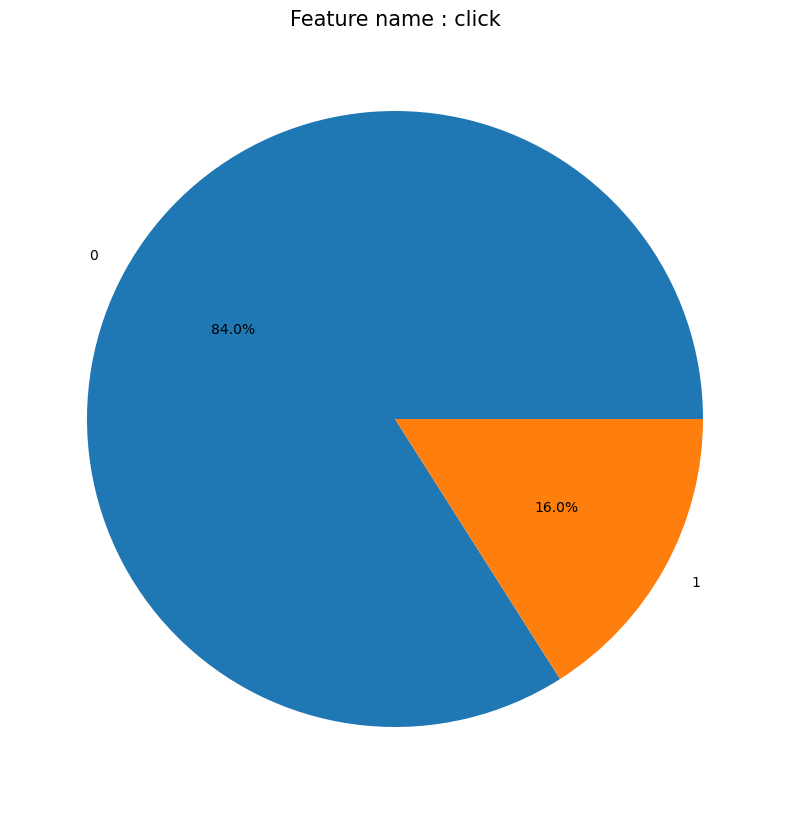

In [48]:
plt.figure(figsize=(20,10))
df.value_counts('click').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : click", fontsize = 15)

#### Observation:
- One 16% of the time user click on an ad.

**"banner_pos"**

In [49]:
df['banner_pos'].value_counts()

0    815
1    185
Name: banner_pos, dtype: int64

### Data Preprocessing

In [50]:
# In test data

df_test.isna().sum()

id                  0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

In [51]:
# Dropping null values from test data

df_test = df_test.dropna()

### Selecting X, and y data

In [52]:
# Split the train data into features (X) and target variable (y)
X = df.drop('click', axis=1)
y = df['click']

### Feature Encoding

In [53]:
import category_encoders as ce

encoder=ce.OneHotEncoder(cols=object_cols, handle_unknown='return_nan', return_df=True,use_cat_names=True)

In [54]:
X = encoder.fit_transform(X)

### Train test split

In [55]:
# Split the train data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Model training

In [56]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Sai\anaconda3\envs\placementTask\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model evaluation

In [57]:
# Evaluate the model's performance on the validation set

val_predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, val_predictions)

print('Validation Accuracy:', accuracy)

Validation Accuracy: 0.81


### Making prediction on test data

In [58]:
df_test.head(2)

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000174058809263569,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,10000182526920855428,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51


In [59]:
df_test = encoder.transform(df_test)

In [ ]:
test_prediction = model.predict_proba(df_test)

In [ ]:
# Make predictions on the test data

test_predictions = model.predict_proba(df_test)[:, 1]